In [1]:
import numpy as np

In [2]:
# シグモイド関数の実装
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
# グラフのインライン表示
%matplotlib inline

#　ライブラリのインポート
import matplotlib.pyplot as plt

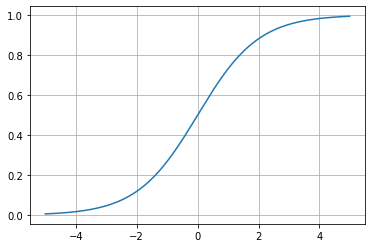

In [4]:
x = np.arange(-5.0, 5.0, 0.01)
y = sigmoid(x)
plt.plot(x, y)
plt.grid(True)
plt.show()

### 単純パーセプトロンで論理ゲートを実する

In [5]:
def create_matrix(x):
    '''
    データx1, x2にバイアスに対応するx0(=1)を加えた行列を作成
    Parameters:
        x(ndarray):x1, x2を格納した2階テンソル
    '''
    x0 = np.ones([x.shape[0], 1])
    return np.hstack([x0, x])

In [6]:
def sigmoid(X, parameter):
    '''
    シグモイド関数
    Parameters:
        X(ndarray):x0, x1, x2を格納した2階テンソル
    Returns:
        シグモイド関数適用後のX
    '''
    return 1 / (1 + np.exp(-np.dot(X, parameter)))

In [8]:
def logistic_regression(X, t):
    '''
    二値分類を行う単純パーセプトロン
    Parameters:
        X(ndarray):x0, x1, x2が格納された2階テンソル
        t(ndarray):正解ラベルが格納された1階テンソル
    '''
    # 学習率
    LNR = 1e-1
    loop = 50
    count = 1
    parameter = np.random.rand(3)
    for i in range(loop):
        #　バイアス、w1, w2を勾配降下法で更新
        parameter = parameter - LNR * np.dot(sigmoid(X, parameter) - t, X)
        # 最初の1回と以降10回ごとにパラメーターの値を出力
        if (count == 1 or count % 10 == 0):
            print('{}回： parameter = {}'.format(count, parameter))
        count += 1
    return parameter

In [9]:
# ANDゲートの学習を行う
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
t = np.array([0, 0, 0, 1])
X = create_matrix(x)
parameter = logistic_regression(X, t)

1回： parameter = [0.71226255 0.70401993 0.20835103]
10回： parameter = [-0.50019294  0.43872305  0.03712424]
20回： parameter = [-1.04117589  0.55629374  0.239741  ]
30回： parameter = [-1.38332709  0.74524314  0.49208155]
40回： parameter = [-1.66497485  0.93065407  0.72671427]
50回： parameter = [-1.91615277  1.10149118  0.93629624]


In [10]:
# 学習した重み・バイアスを使ってANDゲートの出力を表示してみる
(sigmoid(create_matrix(np.array([[0, 0], [0, 1], [1, 0], [1, 1]])), parameter) >= 0.5).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


array([0, 0, 0, 1])

In [11]:
# NANDゲートの学習を行う
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
t = np.array([1, 1, 1, 0])
X = create_matrix(x)
parameter = logistic_regression(X, t)

1回： parameter = [0.7746562  0.28436473 0.63284027]
10回： parameter = [ 0.83969286 -0.14520538  0.14681825]
20回： parameter = [ 1.09514204 -0.45434936 -0.21931085]
30回： parameter = [ 1.38134335 -0.69019435 -0.50135095]
40回： parameter = [ 1.65268033 -0.89108229 -0.73884295]
50回： parameter = [ 1.90268521 -1.06964085 -0.94633797]


In [12]:
# 学習した重み・バイアスを使ってANDゲートの出力を表示してみる
(sigmoid(create_matrix(np.array([[0, 0], [0, 1], [1, 0], [1, 1]])), parameter) >= 0.5).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


array([1, 1, 1, 0])

In [13]:
# ORゲートの学習を行う
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
t = np.array([0, 1, 1, 1])
X = create_matrix(x)
parameter = logistic_regression(X, t)

1回： parameter = [0.65012852 0.15878134 0.6027127 ]
10回： parameter = [0.61693252 0.53886201 0.91648549]
20回： parameter = [0.46846427 0.85645105 1.17878054]
30回： parameter = [0.29801259 1.12475367 1.40270133]
40回： parameter = [0.13335588 1.36344558 1.6046024 ]
50回： parameter = [-0.01793207  1.58056962  1.79084254]


In [14]:
# 学習した重み・バイアスを使ってORゲートの出力を表示してみる
(sigmoid(create_matrix(np.array([[0, 0], [0, 1], [1, 0], [1, 1]])), parameter) >= 0.5).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


array([0, 1, 1, 1])

### TensorFlowスタイルによるXORゲートの実装

In [24]:
train = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
label = np.array([
    [0],
    [1],
    [1],
    [0]
])

In [25]:
import tensorflow as tf

class MLP(tf.keras.Model):
    '''
    多層パーセプトロン
    Attributes:
        l1(Dense): 隠れ層
        l2(Dense): 出力層
    '''
    def __init__(self, input_dim, hidden_dim, output_dim):
        '''
        モデルの初期化を行う
        Parameters:
            input_dim: 入力する1データあたりの値の形状
            hidden_dim(int): 隠れ層のニューロン層
            output_dim(int): 出力層のニューロン層
        '''
        super(MLP, self).__init__()
        # 隠れ層
        self.l1 = tf.keras.layers.Dense(
            units=hidden_dim,
            input_dim=input_dim,
            activation='sigmoid'
        )
        # 出力層
        self.l2 = tf.keras.layers.Dense(
            units=output_dim,
            activation='sigmoid'
        )
    
    @tf.function
    def call(self, x, training=None):
        '''
        モデルのインスタンスからコールバックされる関数
        MLPの順伝播処理を行う
        Parameters:
            x(ndarray(float32)): 訓練データまたは検証データ
            training(bool): 訓練True、検証False
        Returns(float32): 出力層からの出力値
        '''
        h = self.l1(x)
        y = self.l2(h)
        return y

In [26]:
# 入力層2ニューロン、隠れ層2ニューロン、出力層1ニューロンのモデルを生成
model = MLP(2, 2, 1)

In [27]:
'''
損失関数とオプティマイザーの生成
'''
# バイナリ用のクロスエントロピー誤差のオブジェクトを生成
loss_fn = tf.keras.losses.BinaryCrossentropy()
# 勾配降下アルゴリズムを使用するオプティマイザーを生成
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)

In [28]:
'''
勾配降下アルゴリズムによるパラメーターの更新処理
'''
@tf.function
def train_step(x, t):
    '''
    バックプロパゲーションによるパラメータ更新を行う
    Parameters:
        x(ndarray(float32)): 訓練データ
        t(ndarray(float32)): 正解ラベル
    
    Returns:
        MLPの出力と正解ラベルのクロスエントロピー誤差
    '''
    # 自動微分による勾配計算のための操作を記録するブロック
    with tf.GradientTape() as tape:
        predictions = model(x)
        pred_loss = loss_fn(t, predictions)
    
    # tapeに記録された操作を使用して誤差の勾配を計算
    gradients = tape.gradient(
        pred_loss,
        model.trainable_variables
    )

    # 勾配降下法の更新式を適用してバイアス、重みを更新
    optimizer.apply_gradients(
        zip(gradients, model.trainable_variables)
    )
    return pred_loss

In [29]:
'''
モデルを使用して学習する
'''
epochs = 4000

for epoch in range(epochs):
    # 1エポックごとの損失を保持する変数
    epoch_loss = 0.

    # データをモデルに入力し、バイアス、重みを更新して誤差を取得
    loss = train_step(train, label)
    epoch_loss += loss.numpy()

    # 1000エポックごとに結果を出力
    if (epoch + 1) % 1000 == 0:
        print('epoch({}) loss: {:.4f}'.format(epoch + 1, epoch_loss))

# モデルの構造を出力
model.summary()

epoch(1000) loss: 0.6931
epoch(2000) loss: 0.6931
epoch(3000) loss: 0.6929
epoch(4000) loss: 0.5648
Model: "mlp_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             multiple                  6         
                                                                 
 dense_3 (Dense)             multiple                  3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [31]:
'''
モデルを評価する
'''
# 学習済みのMLPの出力
print(model(train))

# 学習した重み・バイアスを使ってXORゲートの出力を表示
# MLPの出力が0.5以上であれば1、そうでなければ0を返す
print(tf.cast(((model(train)) >= 0.5), tf.int32))

tf.Tensor(
[[0.41605067]
 [0.41266626]
 [0.73142195]
 [0.4053288 ]], shape=(4, 1), dtype=float32)
tf.Tensor(
[[0]
 [0]
 [1]
 [0]], shape=(4, 1), dtype=int32)


### KerasスタイルによるXORゲートの実装

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

# XORゲートの入力値　0と1の組み合わせの行列（4, 2）
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
T = np.array([[0], [1], [1], [0]])

In [36]:
'''
モデルの作成
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model = Sequential()

# 隠れ層
model.add(
    Dense(input_dim=2,
          units=2,
          activation="sigmoid"))

# 出力層
model.add(
    Dense(units=1,
          activation='sigmoid'))

# モデルのコンパイル
model.compile(
    optimizer=SGD(lr=0.5),
    loss='binary_crossentropy')

# モデルのサマリを表示
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
'''
モデルの学習
'''
history = model.fit(
    train,
    label,
    epochs=4000,
    batch_size=4,
    verbose=2
)

In [38]:
'''
学習結果の確認
'''
print('loss:', history.history['loss'][-1])
pred = model.predict(train, batch_size=4)
print(pred)
print((pred >= 0.5).astype(np.int))

loss: 0.350027471780777
[[0.00360811]
 [0.4986454 ]
 [0.996009  ]
 [0.50173926]]
[[0]
 [0]
 [1]
 [1]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


### PyTorchによるXORゲートの実装

In [62]:
'''
訓練データと正解ラベルの用意
'''
import torch

train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
label = np.array([[0], [1], [1], [0]])

train_x = torch.Tensor(train)
train_y = torch.Tensor(label)

In [63]:
'''
モデルの定義
'''
import torch.nn as nn

class MLP(nn.Module):
    '''
    多層パーセプトロン
    Attributes:
        l1(Linear): 隠れ層
        l2(Linear): 出力層
        a1(Sigmoid): 隠れ層の活性化関数
        a2(Sigmoid): 出力層の活性化関数
    '''
    def __init__(self, input_dim, hidden_dim, output_dim):
        '''
        Parameters:
            hidden_dim(int): 隠れ数のユニット数
            output_dim(int): 出力数のユニット数
        '''
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)

        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        '''
        MLPの順伝播処理を行う
        Parameters:
            x(ndarray(float32)): 訓練データ、、または検証データ
        Returns(float32):
            出力層からの出力値
        '''
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        return x

In [64]:
'''
モデルの生成
'''
# 使用可能なデバイス（CPUまたはGPU）を取得する
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# モデルオブジェクトを生成し、使用可能なデバイスを設定する
model = MLP(2, 2, 1).to(device)

model

MLP(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)

In [65]:
'''
損失関数とオプティマイザーの生成
'''
import torch.optim

# バイナリ用のクロスエントロピーの誤差のオブジェクトを生成
criterion = nn.BCELoss()
# 勾配降下アルゴリズムを使用するオプティマイザーを生成
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

In [66]:
'''
勾配降下アルゴリズムによるパラメーターの更新処理
'''
def train_step(x, t):
    '''
    バックバックプロパゲーションによるパラメーター更新を行う
    Parameters:
        x(ndarray(float32)): 訓練データ
        t(ndarray(float32)): 正解ラベル
    
    Returns:
        MLPの出力と正解ラベルのクロスエントロピー誤差
    '''
    # モデルを訓練モードにする
    model.train()
    outputs = model(x)
    loss = criterion(outputs, t)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return loss

In [67]:
'''
モデルを使用して学習する
'''
# エポック数
epochs = 4000

# 学習を行う
for epoch in range(epochs):
    # 1エポックごとの損失を保持する変数
    epoch_loss = 0.

    # torch.Tensorオブジェクトにデバイスを割り当てる
    train_x, train_y = train_x.to(device), train_y.to(device)

    # データをモデルに入力し、バイアス、重みを更新して誤差を取得
    loss = train_step(train_x, train_y)
    epoch_loss += loss.item()

    # 1000エポックごとに結果を出力
    if (epoch + 1) % 1000 == 0:
        print('epoch({}) loss: {:.4f}'.format(epoch + 1, epoch_loss))

epoch(1000) loss: 0.6931
epoch(2000) loss: 0.6923
epoch(3000) loss: 0.0764
epoch(4000) loss: 0.0167


In [69]:
'''
学習済みモデルで予測する
'''
# 学習済みのMLPの出力
outputs = model(train_x)
print(outputs)
# デバイスがCPUに設定されたTensorを取得し、これをNumpy配列に変換
# 出力値を閾値0.5で0と1に分類する
# preds = (outputs.to('cuda').detach().numpy().copy() > 0.5).astype(np.int32)
# print(preds)

tensor([[0.0198],
        [0.9850],
        [0.9850],
        [0.0162]], grad_fn=<SigmoidBackward0>)
